# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: Rubtsov Vasiliy</center>

#### <hr /> General Information

**Due Date:** 03.04.2016 23:59 <br \>
**Late submission policy:** the task will not be graded! <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


In [1]:
import numpy as np
import networkx as nx
import scipy.io

%matplotlib inline

import matplotlib.pyplot as plt

Let's define the algorithm

In [ ]:

def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums
    M = T
    while(1):
        #print('step ', step)
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        col_sums = M1.sum(axis = 0)
        M1 = M1 / col_sums
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            return M1
        else:
            M = M1

Let's draw the network1 and fix the position which we will use in all pictures in this task

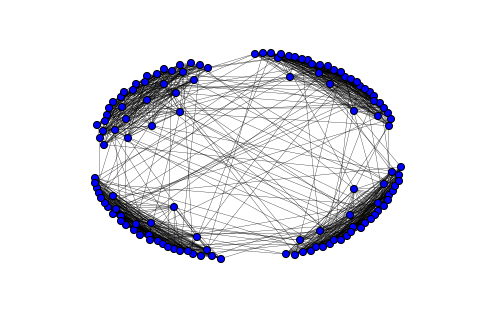

In [193]:

data = scipy.io.loadmat('network1.mat')
pos = nx.spring_layout(G)
nx.draw(nx.Graph(data['A']), pos, node_size= 50, width=0.3, node_color='b')

Let's implement our algorithm 

4  - number of clusters


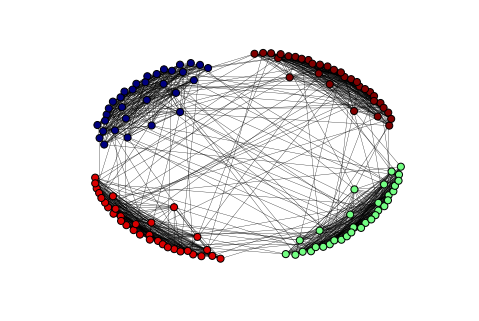

In [194]:
M = MCL(data['A'], 0.0001, 2, 2)
print(len(np.unique(M.nonzero()[0])), ' - number of clusters')
nx.draw(nx.Graph(data['A']), pos, node_size= 50, width=0.3, node_color=M.nonzero()[0])

We can see that our algorithm define the clusters very well

Let's draw network2

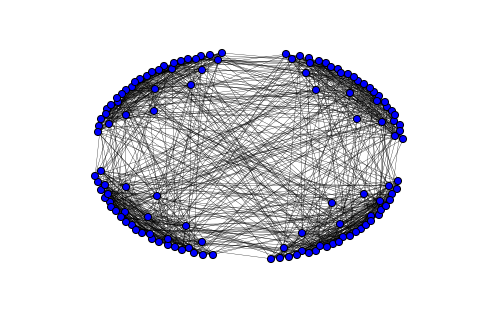

In [181]:
data = scipy.io.loadmat('network2.mat')
nx.draw(nx.Graph(data['A']), pos, node_size= 50, width=0.3, node_color='b')

Let's find the clusters

109  - number of clusters


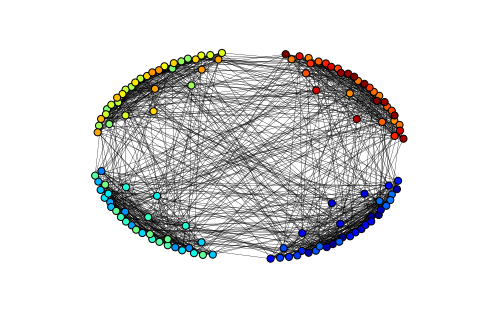

In [185]:
M = MCL(data['A'], 0.0001, 2, 2)
print(len(np.unique(M.nonzero()[0])), ' - number of clusters')
nx.draw(nx.Graph(data['A']), pos, node_size= 50, width=0.3, node_color=M.nonzero()[0])

We can see that the number of clusters is big, so we should tuck up the parameters of this graph.

4  - number of clusters


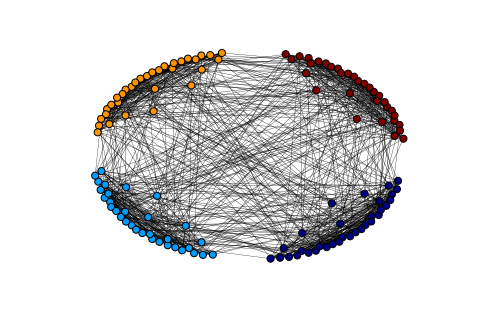

In [184]:
M = MCL(data['A'], 0.00001, 2, 1.9)
print(len(np.unique(M.nonzero()[0])), ' - number of clusters')
nx.draw(nx.Graph(data['A']), pos, node_size= 50, width=0.3, node_color=M.nonzero()[0])

We have achieved the same results as at network1 with alpha = 0.9

Let's draw the network3

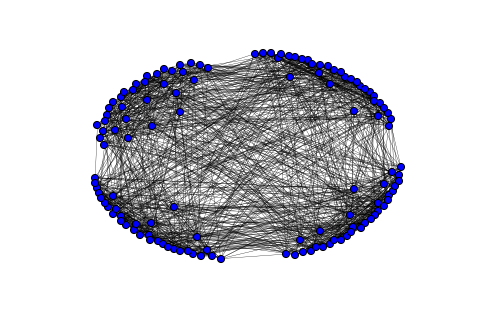

In [196]:
data = scipy.io.loadmat('network3.mat')
nx.draw(nx.Graph(data['A']), pos, node_size= 50, width=0.3, node_color='b')

127  - number of clusters


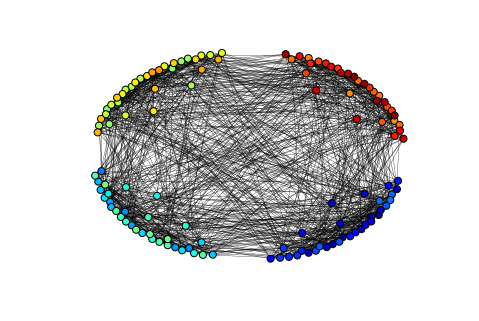

In [190]:
M = MCL(data['A'], 0.0001, 2, 2)
print(len(np.unique(M.nonzero()[0])), ' - number of clusters')
nx.draw(nx.Graph(data['A']), pos, node_size= 50, width=0.3, node_color=M.nonzero()[0])

The number of clusters is the same that the number of nodes so let's tuck up the parameters.

11  - number of clusters


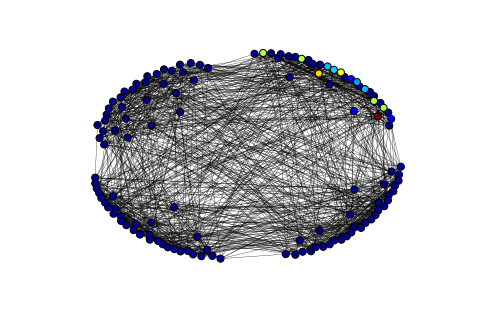

In [198]:
M = MCL(data['A'], 0.00001, 2, 1.795)
print(len(np.unique(M.nonzero()[0])), ' - number of clusters')
nx.draw(nx.Graph(data['A']), pos, node_size= 50, width=0.3, node_color=M.nonzero()[0])

We can see that in this graph no clusters structer. 

### Task 2

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

In [82]:
import scipy.io 
import scipy.sparse as sparse
data = scipy.io.loadmat('music_data.mat')

Let's define the function

In [83]:
def partition(A, L, D, left, right, indexing, bands, threshold):
    if right - left > threshold: #we will not divide the set if the volume is less than threshold
        
        #Let's find the first and second eigenvector/eigenvalue pairs using the part of matrix L and D that are used
        la, v = sparse.linalg.eigsh(L[indexing[left:right], :][:, indexing[left:right]], 
                                    k=2,  
                                    M = D[indexing[left:right], :][:, indexing[left:right]], 
                                    which = 'SM')
        
        #Let's resort indexing according the two parts in which we've divided
        index = sorted([(np.sign(v[:, 1])[i], i) for i in range(len(v[:, 1]))])
        index = [ind[1] + left for ind in index]
        
        middle = [i for i in range(len(index) -1) if index[i] > index[i+1]][0] + 1
        indexing = indexing[:left] + [indexing[i] for i in index] + indexing[right:]
        
        #Recursive calling next partition
        indexing = partition(A, L, D, left, middle + left, indexing, bands, threshold)
        indexing = partition(A, L, D, middle + left, right, indexing, bands, threshold)
    else:
        #if volume is less than threshold we append our group of bands in corresponding list
        bands.append(indexing[left:right])
    return indexing

In [84]:
A = data['A']
n = 9276

In [85]:
#defin matrixex L and D
D = sparse.csr_matrix(np.diagflat(A.sum(axis = 0)))  
L = D - A

In [86]:
#Here we are using the threshoh = 500
bands = []
index = partition(A, L, D, 0, n, list(range(n)), bands, 500)

In [87]:
B = A.toarray()
B = B[np.ix_(index, index)]
B = sparse.csc_matrix(B)

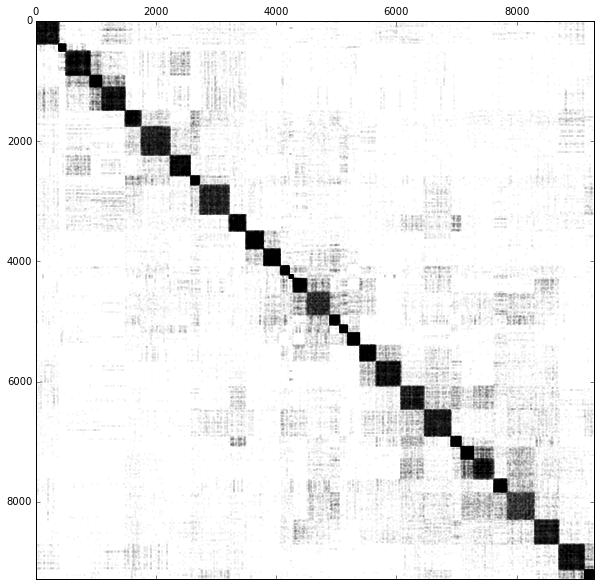

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.spy(B, markersize = .002)

In [89]:
#Here we are using the threshoh = 50
bands = []
index = partition(A, L, D, 0, n, list(range(n)), bands, 50)

B = A.toarray()
B = B[np.ix_(index, index)]
B = sparse.csc_matrix(B)

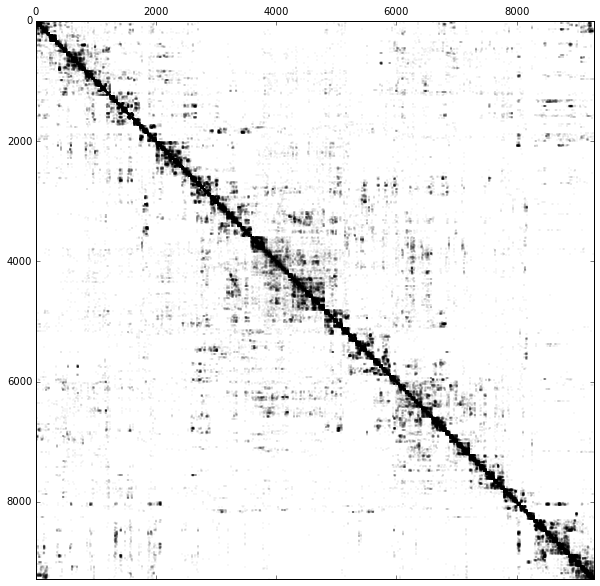

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.spy(B, markersize = .002)

In [111]:
#Let's see the indexes for some group that can be very similar

artists2 = np.array(data['artists'])
artists = artists2[np.ix_(index)]

def get_ind(str):
    ind = [i for i in range(len(data['artists'])) if str in data['artists'][i]][0]
    return [i for i in range(len(data['artists'])) if index[i] == ind][0]

print(get_ind('Coldplay'))
print(get_ind('Radiohead'))

2699
2677


In [92]:
print(get_ind('Portishead'))
print(get_ind('Tricky'))

2459
2436


In [93]:
print(get_ind('Enrique Iglesias'))
print(get_ind('Shakira'))
print(get_ind('Britney Spears'))
print(get_ind('Christina Aguilera'))



1403
1397
1406
1411


In [ ]:
#We can see that indeed the algorithm work very well

In [115]:
#Let's find all similar groups of some group that is fixed
def get_all_similarities(str):
    tmp = [i for i in range(len(data['artists'])) if str in data['artists'][i]][0]
    ind = [i for i in range(len(bands)) if tmp in bands[i]][0]
    print(artists2[bands[ind]])

In [118]:
#Art Blakey - jazzman
get_all_similarities('Art Blakey')

['Arturo Sandoval                                    '
 'Keith Jarrett                                      '
 'Brandy                                             '
 'Branford Marsalis                                  '
 'Sun Ra                                             '
 'Herbie Hancock                                     '
 'Stanley Turrentine                                 '
 'Billie Holiday                                     '
 'Janet Jackson                                      '
 'Dizzy Gillespie                                    '
 'Poncho Sanchez                                     '
 'Lionel Hampton                                     '
 'Lee Morgan                                         '
 'John Coltrane Quartet                              '
 'Milt Jackson                                       '
 'Modern Jazz Quartet                                '
 'Count Basie                                        '
 'Vanessa Williams                                   '
 'Dexter G

In [ ]:
#We can see that indeed all bands it is a jazz bands

In [117]:
#Another similar bands
get_all_similarities('Coldplay')

['Blind Melon                                        '
 'Radiohead                                          '
 'Mother Love Bone                                   '
 'The Strokes                                        '
 'Nikka Costa                                        '
 'O.A.R.                                             '
 'Damien Rice                                        '
 'The Violent Femmes                                 '
 'Zwan                                               '
 'The Pixies                                         '
 'Gorillaz                                           '
 'The Verve                                          '
 'Mad Season                                         '
 'Dave Navarro                                       '
 'Green River                                        '
 'Robbie Williams                                    '
 "Jane's Addiction                                   "
 'Prozzak                                            '
 'The Hive

In [120]:
get_all_similarities('Beyonce')

['Usher Raymond                                      '
 'Ashanti                                            '
 'Salt-N-Pepa                                        '
 'Missy Elliott                                      '
 'Whitney Houston                                    '
 'Pharrell                                           '
 'Mya                                                '
 'Lauryn Hill                                        '
 'Ashanti [90s]                                      '
 'Monica                                             '
 'Dru Hill                                           '
 'All-4-One                                          '
 'Jaheim                                             '
 'Wayne Wonder                                       '
 'Erykah Badu                                        '
 'Beyonce                                            '
 'Ruben Studdard                                     '
 'Queen Latifah                                      '
 'Wyclef J

In [121]:
get_all_similarities('Prodigy')

['Fatboy Slim                                        '
 'The Prodigy                                        '
 'Moby                                               '
 'Tricky                                             '
 'Morcheeba                                          '
 'Keoki                                              '
 'Orbital                                            '
 'Dirty Vegas                                        '
 'Paul Oakenfold                                     '
 'Cypress Hill                                       '
 'Massive Attack                                     '
 'Underworld                                         '
 'New Order                                          '
 'Kruder & Dorfmeister                               '
 'Basement Jaxx                                      '
 'Sasha & Digweed                                    '
 'The Crystal Method                                 '
 'DJ Shadow                                          '
 'Daft Pun